# Problem 1:

This will take a data set and just create different styles of plots.

In [23]:
dataTable = readcsv("fluTrends.csv")
X = real(dataTable[2:end,:])
@show X[10,:]

X[10, :] = [1.354, 1.45, 1.46, 1.794, 1.583, 1.894, 1.831, 2.364, 2.094, 1.941]


10-element Array{Float64,1}:
 1.354
 1.45 
 1.46 
 1.794
 1.583
 1.894
 1.831
 2.364
 2.094
 1.941

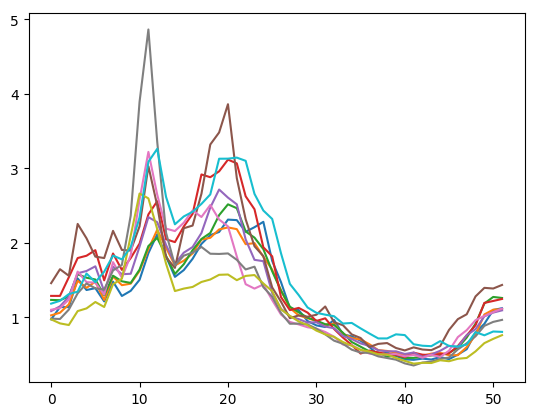

10-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb240390>
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb240450>
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb240510>
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb2405d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb240690>
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb240750>
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb240810>
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb2408d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb240990>
 PyObject <matplotlib.lines.Line2D object at 0x7f1beb240a50>

In [24]:
using PyPlot
plot(X)

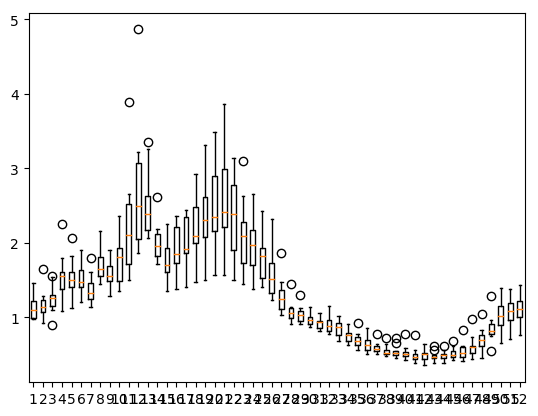

Dict{Any,Any} with 6 entries:
  "means"    => Any[]
  "whiskers" => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…
  "fliers"   => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…
  "boxes"    => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…
  "caps"     => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…
  "medians"  => PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7…

In [25]:
boxplot(X')

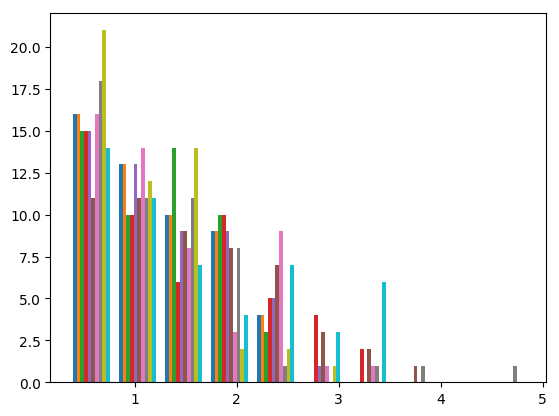

(Array{Float64,1}[[16.0, 13.0, 10.0, 9.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0], [16.0, 13.0, 10.0, 9.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0], [15.0, 10.0, 14.0, 10.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0], [15.0, 10.0, 6.0, 10.0, 5.0, 4.0, 2.0, 0.0, 0.0, 0.0], [15.0, 13.0, 9.0, 9.0, 5.0, 1.0, 0.0, 0.0, 0.0, 0.0], [11.0, 11.0, 9.0, 8.0, 7.0, 3.0, 2.0, 1.0, 0.0, 0.0], [16.0, 14.0, 8.0, 3.0, 9.0, 1.0, 1.0, 0.0, 0.0, 0.0], [18.0, 11.0, 11.0, 8.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0], [21.0, 12.0, 14.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0], [14.0, 11.0, 7.0, 4.0, 7.0, 3.0, 6.0, 0.0, 0.0, 0.0]], [0.352, 0.803, 1.254, 1.705, 2.156, 2.607, 3.058, 3.509, 3.96, 4.411, 4.862], NTuple{10,PyCall.PyObject}[(PyObject <matplotlib.patches.Rectangle object at 0x7f1bea099c90>, PyObject <matplotlib.patches.Rectangle object at 0x7f1bea099a50>, PyObject <matplotlib.patches.Rectangle object at 0x7f1bea099f90>, PyObject <matplotlib.patches.Rectangle object at 0x7f1bea0a4390>, PyObject <matplotlib.patches.Rectangle object at 0x7f1bea0a46d0>

In [26]:
plt[:hist](X)

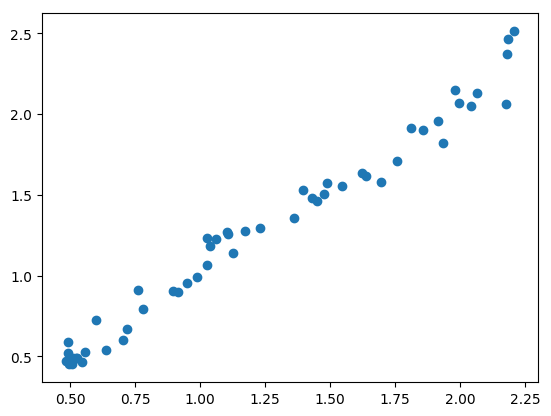

PyObject <matplotlib.collections.PathCollection object at 0x7f1be9f27250>

In [27]:
scatter(X[:,2],X[:,3])

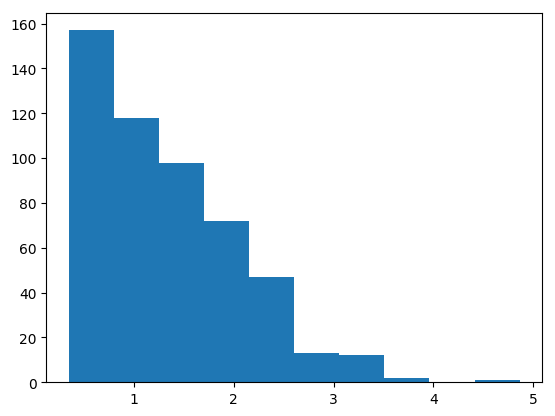

([157.0, 118.0, 98.0, 72.0, 47.0, 13.0, 12.0, 2.0, 0.0, 1.0], [0.352, 0.803, 1.254, 1.705, 2.156, 2.607, 3.058, 3.509, 3.96, 4.411, 4.862], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f1be9ea8110>, PyObject <matplotlib.patches.Rectangle object at 0x7f1be9e9be90>, PyObject <matplotlib.patches.Rectangle object at 0x7f1be9ea8410>, PyObject <matplotlib.patches.Rectangle object at 0x7f1be9ea87d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f1be9ea8b10>, PyObject <matplotlib.patches.Rectangle object at 0x7f1be9ea8e90>, PyObject <matplotlib.patches.Rectangle object at 0x7f1be9eb2250>, PyObject <matplotlib.patches.Rectangle object at 0x7f1be9eb25d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f1be9eb2950>, PyObject <matplotlib.patches.Rectangle object at 0x7f1be9eb2cd0>])

In [28]:
plt[:hist](X[:])

# Problem 2.2: Decision Stump

This will consider a decision tree on a dataset. I have modified the code in "decisionStump.jl" to allow for a new function to be created. This new function will return the decision stump based on inequality and therefore you should see the north blue and south red in this example.

Error with majority predictor: 0.41
Error with equality-rule decision stump: 

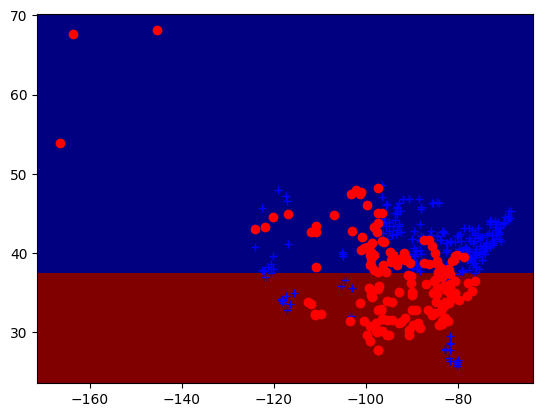

0.25


PyObject <matplotlib.contour.QuadContourSet object at 0x7f2af30f1850>

In [7]:
# Load X and y variable
using JLD
X = load("citiesSmall.jld","X")
y = load("citiesSmall.jld","y")

# Compute number of objects and number of features
(n,d) = size(X)

################################
### Majority Predictor Model ###
################################

# Fit majority predictor and compute error
include("majorityPredictor.jl")
model = majorityPredictor(X,y)

# Evaluate training error
yhat = model.predict(X)
trainError = sum(yhat .!= y)/n
@printf("Error with majority predictor: %.2f\n",trainError);

################################
### Decision Stump Moodel ######
################################

# Fit decision stump classifier that uses equalities
include("decisionStump.jl")
model = decisionStump(X,y)

# Evaluate training error
yhat = model.predict(X)
trainError = sum(yhat .!= y)/n
@printf("Error with equality-rule decision stump: %.2f\n",trainError);

# Plot classifier
include("plot2Dclassifier.jl")
plot2Dclassifier(X,y,model)



## Problem 2.3: Decision Tree
Unsure how to extract the stumps, but the if/else statements are easy once you have them. For depth=2 we have a tree with two splits over each coordinate

Error with depth-5 decision tree: 0

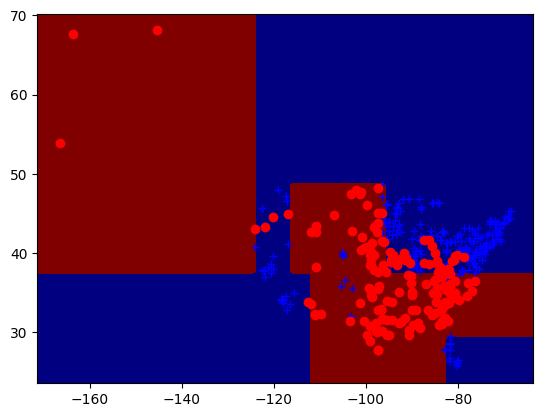

.107


PyObject <matplotlib.contour.QuadContourSet object at 0x7f2aeed07250>

In [8]:
# Load X and y variable
using JLD
X = load("citiesSmall.jld","X")
y = load("citiesSmall.jld","y")
n = size(X,1)

# Fit a decision tree and compute error
include("decisionTree.jl")
depth = 5
model = decisionTree(X,y,depth)

# Evaluate training error
yhat = model.predict(X)
trainError = sum(yhat .!= y)/n
@printf("Error with depth-%d decision tree: %.3f\n",depth,trainError)

# Plot classifier
include("plot2Dclassifier.jl")
plot2Dclassifier(X,y,model)

## Problem 3.2
Plotting the following code "example_trainTest.jl" over several depths to see the test error.
What an annoying error! I can't set the labels on the comparison plot. Blue is Training, Orange is Testing

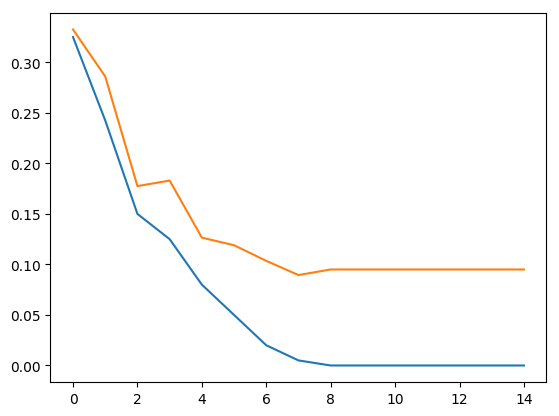

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2aee934250>
 PyObject <matplotlib.lines.Line2D object at 0x7f2aee924390>

In [30]:
testvec = zeros(1,15)
trainvec = zeros(1,15)

for i = 1:15
# Load X and y variable
    using JLD
    X = load("citiesSmall.jld","X")
    y = load("citiesSmall.jld","y")
    n = size(X,1)

# Train a depth-2 decision tree
    depth = i
    include("decisionTree_infoGain.jl")
    model = decisionTree_infoGain(X,y,depth)

# Evaluate the trianing error
    yhat = model.predict(X)
    trainvec[i] = sum(yhat .!= y)/n
    #@printf("Train error with depth-%d decision tree: %.3f\n",depth,trainError)

# Evaluate the test error
    Xtest = load("citiesSmall.jld","Xtest")
    ytest = load("citiesSmall.jld","ytest")
    t = size(Xtest,1)
    yhat = model.predict(Xtest)
    testvec[i] = sum(yhat .!= ytest)/t
    #@printf("Test error with depth-%d decision tree: %.3f\n",depth,testError)
end
together = [trainvec; testvec]
plot(together', label = ["Train" "Test"])

## Problem 3.3
Here we use a valadation set. Blue is Training, Orange is Validation and Green is the Test.
From this, I would chose either depth 6 or 7 to minimize the validation set

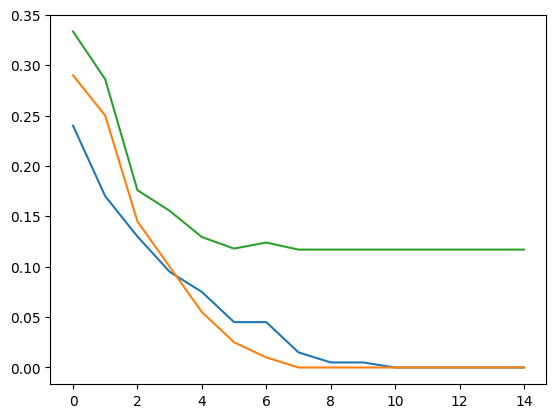

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2ad2103950>
 PyObject <matplotlib.lines.Line2D object at 0x7f2ad2103a10>
 PyObject <matplotlib.lines.Line2D object at 0x7f2ad2103ad0>

In [74]:
testvec = zeros(1,15)
trainvec = zeros(1,15)
valvec = zeros(1,15)

for i = 1:15
# Load X and y variable
    using JLD
    X = load("citiesSmall.jld","X")
    y = load("citiesSmall.jld","y")
    n = size(X,1)
    half = n/2
    
    Xtrain = X[1:200, 1:2]
    ytrain = y[1:200]
    Xval = X[200+1:n, 1:2]
    yval = y[200+1:n]

# Train a depth-2 decision tree
    depth = i
    include("decisionTree_infoGain.jl")
    model = decisionTree_infoGain(Xtrain,ytrain,depth)

# Evaluate the training error
    yhattrain = model.predict(Xtrain)
    trainvec[i] = sum(yhattrain .!= ytrain)/(half)
    #@printf("Train error with depth-%d decision tree: %.3f\n",depth,trainError)
    
# Validation
    model = decisionTree_infoGain(Xval,yval,depth)

# Evaluate the Validation error
    yhatval = model.predict(Xval)
    valvec[i] = sum(yhatval .!= yval)/(half)
    #@printf("Train error with depth-%d decision tree: %.3f\n",depth,trainError)

# Evaluate the test error
    Xtest = load("citiesSmall.jld","Xtest")
    ytest = load("citiesSmall.jld","ytest")
    t = size(Xtest,1)
    yhat = model.predict(Xtest)
    testvec[i] = sum(yhat .!= ytest)/t
    #@printf("Test error with depth-%d decision tree: %.3f\n",depth,testError)
end
together = [trainvec; valvec; testvec]
plot(together', label = ["Train" "Validation" "Test"])

## Problem 4.2

In [38]:
using JLD
data = load("newsgroups.jld")
X = data["X"]
y = data["y"]
Xtest = data["Xtest"]
ytest = data["ytest"]
wordlist = data["wordlist"]
groupnames = data["groupnames"]

wordlist[50] #Tells me the word present if X[:,50] contains a 1

@show X[500,1:100] #This tells me cols 6, 25, 70, 88 have 1s, no idea how to extract from a sparse matrix..
wordlist[[6, 25, 70, 88]] #These are the actual words

y[500] #tells me the group number
groupnames[2] #Actual group name

X[500, 1:100] =   [6  ]  =  1.0
  [24 ]  =  1.0
  [25 ]  =  1.0
  [70 ]  =  1.0
  [88 ]  =  1.0


"rec.*"

## Problem 4.3
Here we run both a decision tree (slow) and a naive Bayes over the bag of words example from above.

In [40]:
# Decision Tree
# Load variables
include("example_bagOfWords.jl")

# Compute test error with decision tree
for depth = 1:20
	include("decisionTree_infoGain.jl")
	model = decisionTree_infoGain(X,y,depth)
	yhat = model.predict(Xtest)
	testError = mean(yhat .!= ytest)
	@printf("Test error with depth-%d decision tree: %.3f\n",depth,testError)
end


Test error with depth-1 decision tree: 0.595
Test error with depth-2 decision tree: 0.595
Test error with depth-3 decision tree: 0.599
Test error with depth-4 decision tree: 0.549
Test error with depth-5 decision tree: 0.515
Test error with depth-6 decision tree: 0.480
Test error with depth-7 decision tree: 0.460
Test error with depth-8 decision tree: 0.439
Test error with depth-9 decision tree: 0.440
Test error with depth-10 decision tree: 0.421
Test error with depth-11 decision tree: 0.421
Test error with depth-12 decision tree: 0.408
Test error with depth-13 decision tree: 0.396
Test error with depth-14 decision tree: 0.387
Test error with depth-15 decision tree: 0.388
Test error with depth-16 decision tree: 0.375
Test error with depth-17 decision tree: 0.368
Test error with depth-18 decision tree: 0.359
Test error with depth-19 decision tree: 0.360
Test error with depth-20 decision tree: 0.355


In [28]:
include("misc.jl") # Includes GenericModel typedef

function naiveBayes(X,y)
	# Implementation of naive Bayes classifier for binary features

	(n,d) = size(X)

  # Compute number of classes, assuming y in {1,2,...,k}
  k = maximum(y)

  # We will store p(y(i) = c) in p_y(c)
  counts = zeros(k)
  for i in 1:n
    counts[y[i]] += 1
  end
  p_y = counts ./= n

  # We will store p(x(i,j) = 1 | y(i) = c) in p_xy(1,j,c)
  # We will store p(x(i,j) = 0 | y(i) = c) in p_xy(2,j,c)
  p_xy = zeros(2,n,k)
  for j in 1:d
      for c in 1:k
          yes = y .== c # Find all values that fall into the group c
          yas = sum(yes) #Find the number of this group
          p_xy[1,j,c] = sum(X[yes,j])/yas # Take all in this group and divide by group length
            p_xy[2,j,c] = sum(X[.!yes,j])/(n-yas) # Take everything else and divide by remaining length
      end
  end
#p_xy=1/2*ones(2,n,k)
    
  function predict(Xhat)
    (t,d) = size(Xhat)
    yhat = zeros(t)

    for i in 1:t
      # p_yx = p_y*prod(p_xy) for the appropriate x and y values
      p_yx = copy(p_y)
      for j in 1:d
        if Xhat[i,j] == 1
          for c in 1:k
            p_yx[c] *= p_xy[1,j,c]
          end
        else
          for c in 1:k
            p_yx[c] *= p_xy[2,j,c]
          end
        end
      (~,yhat[i]) = findmax(p_yx)
      end
    end
    return yhat
  end

	return GenericModel(predict)
end


naiveBayes (generic function with 1 method)

In [30]:
#Naive Bayes
# Load variables
include("example_bagOfWords.jl")

# Compute test error with naive Bayes
include("naiveBayes.jl")
model = naiveBayes(X,y)
yhat = model.predict(Xtest)
testError = mean(yhat .!= ytest)
@printf("Test error with naive Bayes: %.3f\n",testError)

Test error with naive Bayes: 0.465


## Problem 5.1
Need to modify the following code to give a proper KNN predictor

In [ ]:
include("misc.jl") # Includes GenericModel typedef

function knn_predict(Xhat,X,y,k)
  (n,d) = size(X)
  (t,d) = size(Xhat)
  k = min(n,k) # To save you some debuggin
  return fill(1,t)
end

function knn(X,y,k)
	# Implementation of k-nearest neighbour classifier
  predict(Xhat) = knn_predict(Xhat,X,y,k)
  return GenericModel(predict)
end

function cknn(X,y,k)
	# Implementation of condensed k-nearest neighbour classifier
	(n,d) = size(X)
	Xcond = X[1,:]'
	ycond = [y[1]]
	for i in 2:n
    		yhat = knn_predict(X[i,:]',Xcond,ycond,k)
    		if y[i] != yhat[1]
			Xcond = vcat(Xcond,X[i,:]')
			push!(ycond,y[i])
    		end
	end

	predict(Xhat) = knn_predict(Xhat,Xcond,ycond,k)
	return GenericModel(predict)
end


In [31]:
# Load X and y variable
using JLD
X = load("citiesSmall.jld","X")
y = load("citiesSmall.jld","y")
Xtest = load("citiesSmall.jld","Xtest")
ytest = load("citiesSmall.jld","ytest")

# Fit a KNN classifier
k = 1
include("knn.jl")
model = knn(X,y,k)

# Evaluate training error
yhat = model.predict(X)
trainError = mean(yhat .!= y)
@printf("Train Error with %d-nearest neighbours: %.3f\n",k,trainError)

# Evaluate test error
yhat = model.predict(Xtest)
testError = mean(yhat .!= ytest)
@printf("Test Error with %d-nearest neighbours: %.3f\n",k,testError)


Train Error with 1-nearest neighbours: 0.415
Test Error with 1-nearest neighbours: 0.464
